# Assessment 2



In [1]:
import numpy as np
import matplotlib.pyplot as plt

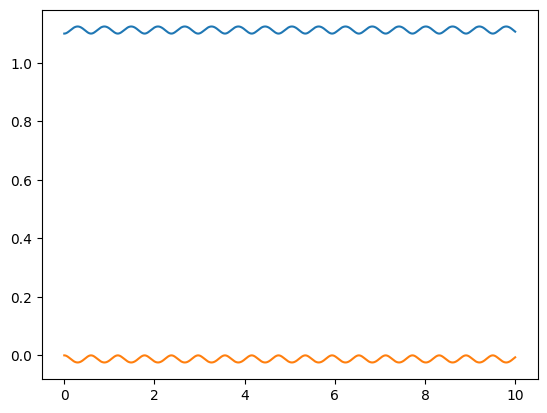

In [77]:
epsilon = 125.7 * 1.38e-23
sigma = 0.3345e-9
argon_mass = 39.948 * 1.67377e-27
tau = np.sqrt(argon_mass * sigma ** 2 / epsilon)

N = 2

def force_coefficient(r):
    return 24 * (-2 * (1 / r) ** 13 + (1 / r) ** 7)

def force_coefficient_2(r):
    return 24 * epsilon / sigma * (-2 * (sigma / r) ** 13 + (sigma / r) ** 7)

pos = np.zeros((N, 3))
pos[0] = np.array([1.1, 0, 0])

vel = np.zeros((N, 3))

acc = np.zeros((N, 3))

dt = 0.001
timesteps = 10000

stored_pos_1 = []
stored_pos_2 = []
stored_pos_3 = []
stored_pos_4 = []
times = []


def calculate_force(pos_p, pos_j):
    r = np.linalg.norm(pos_j - pos_p)
    r_hat = (pos_j - pos_p) / r
    return force_coefficient(r) * r_hat


def calculate_acceleration(pos_p, p):
    acc = np.zeros(3)
    for j in range(N):
        if p != j:
            acc += calculate_force(pos_p, pos[j])
    return acc


for t in range(timesteps):
    times.append(t * dt)
    for p in range(N):
        acc[p] = calculate_acceleration(pos[p], p)
    vel += acc * dt * 0.5
    pos += vel * dt
    for p in range(N):
        acc[p] = calculate_acceleration(pos[p], p)
    vel += acc * dt * 0.5
    stored_pos_1.append(pos[0][0])
    stored_pos_2.append(pos[1][0])


fig, ax = plt.subplots()

ax.plot(times, stored_pos_1)
ax.plot(times, stored_pos_2)
